# Travelling Salesman - Genetic Algorithm

In [2]:
import math
import random
from matplotlib import pyplot as plt

# function to calculate the distance between two cities
def calculate_hypotenuse(map, a, b):
    x1, y1 = map[a]
    x2, y2 = map[b]
    return math.sqrt( abs(x1-x2)**2 + abs(y1-y2) )

# function to calculate the length of the path
def calculate_distance(map, path):
    l = len(path)
    total = 0
    for i in range(l):
        total += calculate_hypotenuse(map, path[i], path[(i+1)%l])
    return total

# function generating a random initial path
def create_initial_random(map):
    indices = list(range(len(map)))
    random.shuffle(indices)
    return indices

# function generating the initial path using greedy algorithm
# always choosing the closest unvisited node
def create_initial_greedy(map, start=None):
    if start is None:
        path = [random.randrange(len(map))]
    else:
        path = [start]
    while len(path) < len(map):
        current = path[-1]
        indices = [ind for ind in range(len(map)) if ind not in path]
        smallest = float("inf")
        next = -1
        for ind in indices:
            if calculate_hypotenuse(map, current, ind) < smallest:
                smallest = calculate_hypotenuse(map, current, ind)
                next = ind
        path.append(next)
    return path

class Route:
    def __init__(self, map, path):
        self.map = map
        self.path = path
        self.distance = calculate_distance(map, path)
        # fitness used in Genetic Algorithm
        self.fitness = 0

    def plot(self):
        r = [self.map[self.path[-1]]]
        for n in self.path:
            r.append(self.map[n])
        x, y = zip(*r)
        plt.scatter(x, y, c="r")
        plt.plot(x, y)
        plt.suptitle(f"Distance = {self.distance}")
        plt.show()

    def __repr__(self):
        return f"Number of nodes = {len(self.path)}, distance = {self.distance}."

def calc_fitness(population):
    total_fitness = max([1/i.distance for i in population])
    # this fitness function compares the distance to the best distance achieved (100%) and ^4 the result, to ensure greater variety in fitness scores
    for i in population:
        i.fitness = ((1/i.distance)/total_fitness)**4
    population.sort(key=lambda i: i.fitness, reverse=True)
    return population

# function for creating initial populations
def create_population(map, popsize, random=True):
    population = list()
    if random == True:
        for i in range(popsize):
            population.append(Route(map, create_initial_random(map)))
    else:
        for i in range(popsize):
            population.append(Route(map, create_initial_greedy(map)))
    return calc_fitness(population)

def selection(population):
    # 10% elite that gets selected automatically
    elite = int(len(population)/10)
    selected = population[:elite]
    while len(selected) < len(population):
        i = random.choice(population)
        if i.fitness > random.random():
            selected.append(i)
    selected = calc_fitness(selected)
    random.shuffle(selected)
    return selected

def crossover(population):
    children = []
    for i in range(0, len(population)):
        parent1_path = population[i].path
        parent2_path = population[(i+1)%len(population)].path
        a = random.randrange(len(parent1_path))
        b = random.randrange(len(parent1_path))
        start = min(a, b)
        stop = max(a, b) + 1
        child1_path = parent1_path[a:b]
        for node in parent2_path:
            if node not in child1_path:
                child1_path.append(node)
        children.append(Route(population[i].map, child1_path))
    return calc_fitness(children)

# function that swaps two random nodes
def node_swapper(path):
    p = list(path)
    index1 = random.randrange(0, len(p))
    index2 = index1
    while index2 == index1:
        index2 = random.randrange(0, len(p))
    temp = p[index2]
    p[index2] = p[index1]
    p[index1] = temp
    return p

def mutation(population):
    for i in population:
        #the chance of mutation increases in less fit specimen
        if random.random() > i.fitness:
            i.path = node_swapper(i.path)
            i.distance = calculate_distance(i.map, i.path)
    return calc_fitness(population)

def run_genetic_algorithm(map, popsize, max_no_improv):
    distances = []
    starting_population = create_population(map, popsize)
    print("Running Genetic Algorithm")
    print("Best initial random route:")
    starting_population[0].plot()
    no_improvement_for = 0
    while no_improvement_for < max_no_improv:
        distances.append(starting_population[0].distance)
        select = selection(starting_population)
        children = crossover(select)
        starting_population = mutation(children)
        if starting_population[0].distance >= distances[-1]:
            no_improvement_for += 1
        else:
            no_improvement_for = 0
    print(f"Best route after {len(distances)} iterations:")
    starting_population[0].plot()
    plt.figure(figsize=(6, 5))
    plt.subplots_adjust(top=0.8)
    plt.plot(distances)
    plt.suptitle(f"Number of nodes = {len(starting_population[0].path)}\nPopulation size = {popsize}\nStarting distance = {distances[0]}\nFinal Distance = {distances[-1]}")
    plt.show()

### A map of 24 nodes

[(2.7933, 3.694), (2.6067, 4.4254), (2.86, 5.0373), (2.54, 6.2463), (3.1267, 6.4701), (3.7267, 6.8881), (4.4867, 7.4403), (5.5533, 7.4254), (6.3, 7.3955), (7.6333, 6.9179), (7.22, 6.3955), (6.6333, 5.8284), (7.0867, 5.1269), (7.4733, 4.4701), (7.18, 3.709), (6.6867, 2.8284), (6.2067, 2.0522), (5.54, 1.8731), (5.1533, 2.3358), (4.9667, 3.0075), (4.8867, 3.5448), (4.2733, 3.2313), (3.6333, 2.7537), (2.9933, 2.8433)]


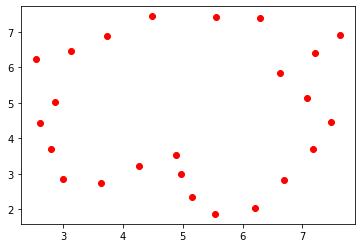

In [3]:
# converting the input matrix into a 2d list
with open("TSP Matrix3.csv") as input:
    map24 = [tuple([float(n) for n in line.split(",")]) for line in input.read().splitlines()]

print(map24)

# * operator can be used in conjunction with zip() to unzip the list
x, y = zip(*map24)
plt.scatter(x, y, c="r")
plt.show()

Running Genetic Algorithm
Best initial random route:


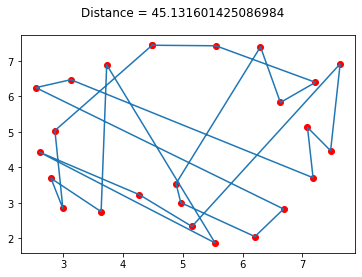

Best route after 433 iterations:


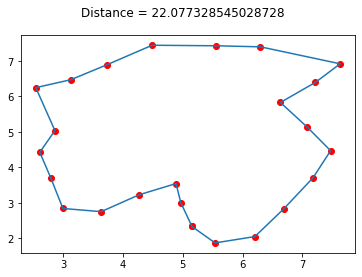

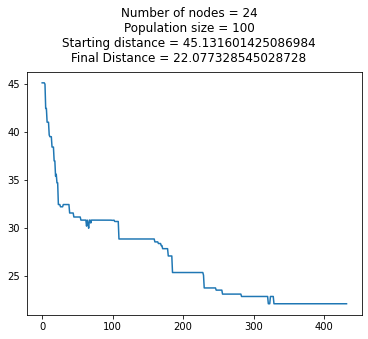

In [4]:
run_genetic_algorithm(map24, 100, 100)

### A random map of 100 nodes

[(1.104, 4.735), (4.951, 3.566), (1.735, 4.691), (7.502, 4.0), (9.955, 9.148), (4.838, 1.704), (0.526, 6.75), (3.844, 8.029), (4.429, 9.202), (6.223, 4.96), (3.36, 1.981), (6.295, 4.285), (1.609, 1.446), (6.154, 6.563), (8.911, 0.596), (3.589, 4.562), (4.957, 8.136), (7.301, 7.42), (5.453, 3.833), (7.973, 1.536), (7.942, 1.235), (7.089, 1.068), (8.331, 4.022), (7.044, 3.101), (4.447, 7.002), (0.425, 8.722), (3.807, 1.302), (7.223, 0.619), (7.684, 8.305), (0.227, 2.271), (8.594, 9.14), (5.385, 5.147), (2.582, 9.082), (8.674, 8.948), (1.84, 1.676), (9.832, 7.536), (0.612, 0.559), (8.578, 8.862), (4.223, 2.118), (8.129, 9.34), (8.25, 2.656), (9.417, 9.737), (0.78, 6.074), (7.119, 8.328), (1.505, 6.073), (9.089, 3.119), (7.147, 0.625), (3.053, 5.159), (7.096, 1.509), (1.438, 4.629), (9.487, 6.95), (4.684, 5.726), (9.44, 8.265), (5.879, 0.647), (0.379, 8.844), (3.205, 5.63), (1.804, 4.265), (6.619, 6.074), (3.163, 3.657), (7.085, 3.911), (4.986, 0.393), (4.613, 8.919), (6.244, 9.664), (2.51

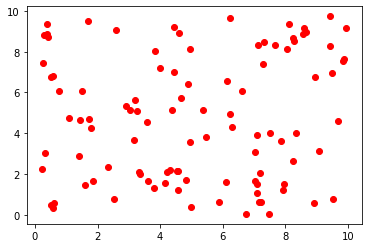

In [5]:
map100 = []

for i in range(100):
    a = round(random.uniform(0, 10), 3)
    b = round(random.uniform(0, 10), 3)
    map100.append((a, b))
    

print(map100)

# * operator can be used in conjunction with zip() to unzip the list
x, y = zip(*map100)
plt.scatter(x, y, c="r")
plt.show()

Running Genetic Algorithm
Best initial random route:


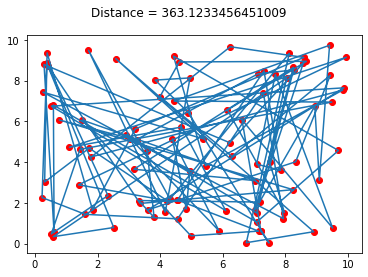

Best route after 930 iterations:


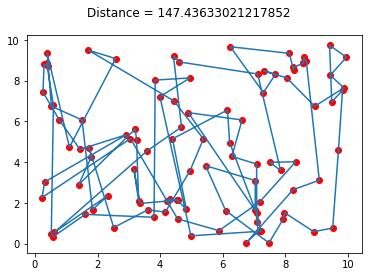

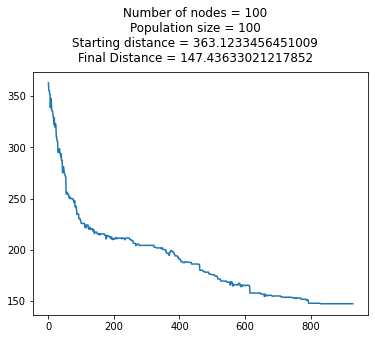

In [6]:
run_genetic_algorithm(map100, 100, 100)